<a href="https://colab.research.google.com/github/CristobalSVM/Procesamiento_Clasificacion_Datos/blob/main/Pr%C3%A1ctica_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Con los links proporcionados, realizar un análisis y
manejo de datos nulos con herramientas de aprendizaje de máquina y aprendizaje
profundo. Detallar:
* Identificar el tipo de datos que están manejando.
* Revisar si pueden determinar distribución de datos nulos en columnas.
* Porque el método que eligieron es el adecuado para esos datos
* Si la decisión es de eliminar las columnas con datos nulos, dar explicación de porque es la mejor opción.



Los datos que se tomaron son al cierre de junio 2023 de la institución financiera Solidar de préstamos grupales, las variables son las siguientes:

**Dependiente**: monto -

**Independientes**: ciclo, integrantes.



In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Crear un DataFrame de ejemplo con valores faltantes
data = pd.read_excel('/content/renovaciones junio 2023 DM.xlsx')

df = pd.DataFrame(data)
df2 = pd.DataFrame(data)



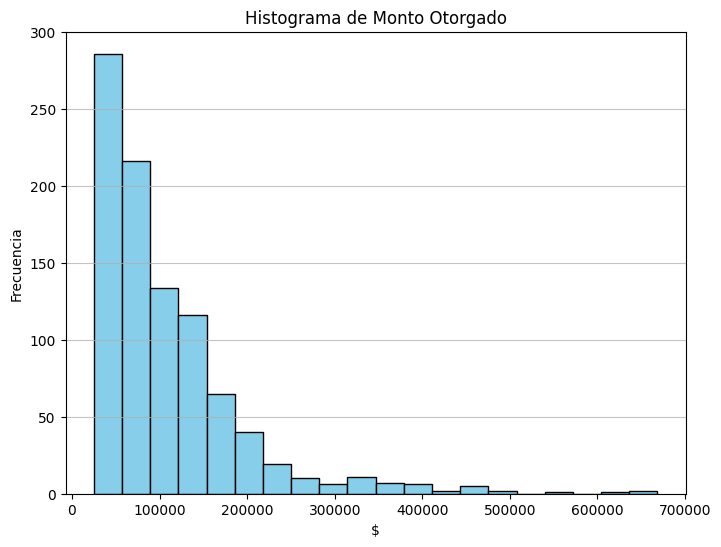

In [20]:
# Crear un histograma de la variable monto
plt.figure(figsize=(8, 6))
plt.hist(df['monto'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Monto Otorgado')
plt.xlabel('$')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [21]:
# Dividir el DataFrame en dos conjuntos: uno con valores nulos y otro sin valores nulos
df_con_nulos = df[df['monto'].isnull()]
df_sin_nulos = df.dropna(subset=['monto'])

# Definir las variables independientes (features) y la variable dependiente (target)
X = df_sin_nulos[['ciclo', 'integrantes']]  # Variables independientes
y = df_sin_nulos['monto']  # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar un modelo de regresión
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)

# Predecir los valores para las filas con valores nulos
valores_imputados = modelo_regresion.predict(df_con_nulos[['ciclo','integrantes']])

# Asignar los valores imputados al DataFrame original
df.loc[df['monto'].isnull(), 'monto'] = valores_imputados




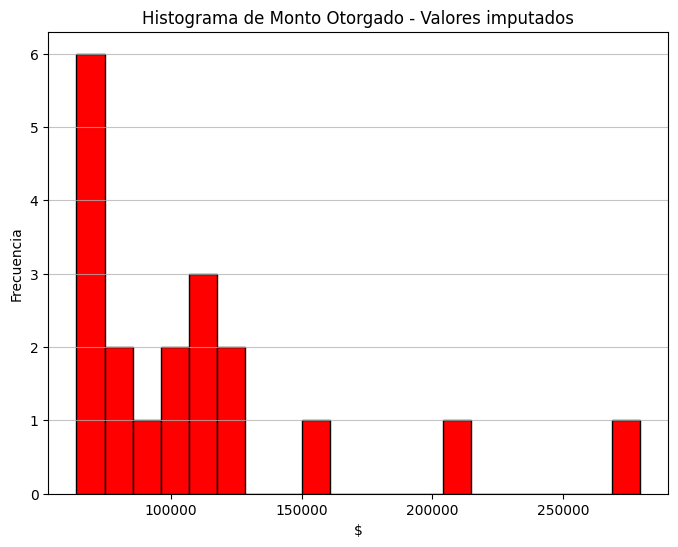

In [22]:
# Crear un histograma de la variable monto
plt.figure(figsize=(8, 6))
plt.hist(valores_imputados, bins=20, color='red', edgecolor='black')
plt.title('Histograma de Monto Otorgado - Valores imputados')
plt.xlabel('$')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

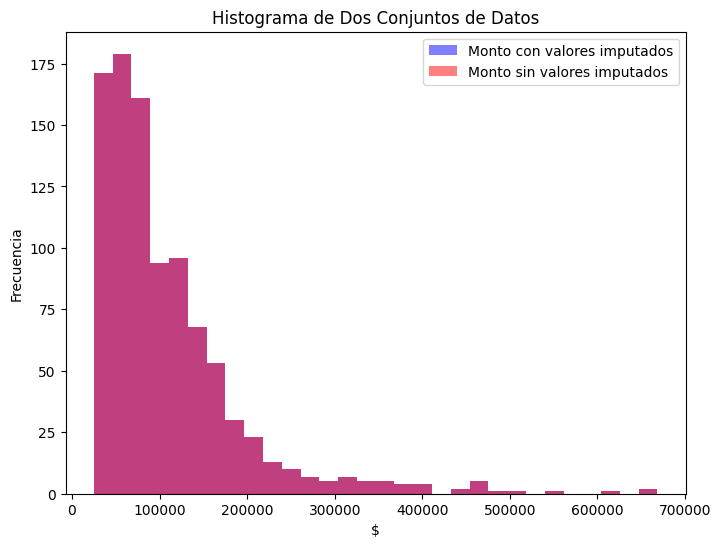

In [25]:
# Crear un histograma con dos conjuntos de datos
plt.figure(figsize=(8, 6))

# Histograma para Variable monto con nulos
plt.hist(df['monto'], bins=30, alpha=0.5, color='blue', label='Monto con valores imputados')

# Histograma para data2
plt.hist(df2['monto'], bins=30, alpha=0.5, color='red', label='Monto sin valores imputados')

# Añadir leyenda
plt.legend()

# Añadir título y etiquetas de ejes
plt.title('Histograma de Dos Conjuntos de Datos')
plt.xlabel('$')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

En este cierre de mes hubo una situación con el proveedor y el sistema tuvo actualizaciones por lo que no se mostraron 19 valores en la columna monto, por lo tanto, el tipo de datos que se manejan son númericos y MCRA porque todas las observaciones (948) tenian la misma probabilidad de tener datos nulos/faltantes.

A pesar de que son pocos datos faltantes (2%), no se eliminará la columna porque es importante para el analisis de una potencial renovación a futuro.

Se usara el método de imputación por arboles de desición para reducir la varianza